Name: Kazuki Unayama,
Github username: kazunayama,
USC ID: 8687139172

<center><h1>INF-552 Lab 0</h1></center>
<br>
<center><font size="4">Introduction to Basic Development Tools</font></center>

### Rules

1. Please read the instructions and problem prompts **carefully**.
2. This lab is to give you some basic APIs of numpy, pandas and scikit-learn. Besides, some topics such as how to make your jupyter notebook be a more efficient developing tools, how to use git and GitHub will also be covered. The lab is to be done individually. You may talk to your fellow classmates about general issues ("Remind me again: Which API should I used for doing group by operation to a data set") but about the specifies of how to do these exercises.
3. Along with a similar vein, you can ask the TA for help, but ask questions about **concepts** but not ask the TA to help you debug your code. The TA is here to help, but not to do the work for you.
4. You are welcome to use the class resources and the Internet.
5. Playing with variations. Solve one problems, and then copy the code to a new cell and play around with it. Doing this is the single most important thing when learning programming.
6. This lab will not be graded but the content is highly related to your future programming assignments. So, treat it wisely.
7. All the content having been gone though in the week 1 discussion is just a snapshot of the most basic concepts. **You need to keep study more about Git, GitHub, Pandas, Numpy and Scikit-Learn in order to finish your programming assignments successfully.**
8. Have fun!

### Setup Development Environment

There are many ways to setup the environment. But, I do recommend a simple idea that is using the Anaconda, which is a pre-build python environment with bundles of useful packages.

**To download the Anaconda, go to the following website:
https://www.anaconda.com/distribution/**. Download the correct version based on your operating system and install it step by step.

Then, **configure your PATH environment variable** to make the conda command work. The following command is an easy way to test whether your configuration is correct. If it is, you will see something as like as the sample output.

> **command:**
>
> conda --version
>
> **sample output:**
>
> conda 4.6.12

**Finally, download this jupyter notebook file,** then change the working directory to where its location in terminal, and type the following command to open the jupter notebook and finish the lab.

> **command:** 
> jupyter notebook

In [1]:
import pandas as pd
import numpy as np

### Pandas

#### The read_csv() Method

First, read the documentation about the *read_csv()* method in Pandas (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). Then, try to read data from file Salaries.csv to a dataframe, make the column playerID in the csv file as the index column and the first row as the header. Also, skip the second row when reading the file.

In [3]:
salary = pd.read_csv("Salaries.csv", index_col="playerID", skiprows=[2], header=0)
#salary[["yearID"]]
salary

,yearID,teamID,lgID,salary
playerID,,,,
barkele01,1985,ATL,NL,870000
benedbr01,1985,ATL,NL,545000
campri01,1985,ATL,NL,633333
ceronri01,1985,ATL,NL,625000
chambch01,1985,ATL,NL,800000
...,...,...,...,...
treinbl01,2015,WAS,NL,512800
ugglada01,2015,WAS,NL,507500
werthja01,2015,WAS,NL,21000000


#### Indexing and Selecting Data

Select the id of the players who are registered in ATL and HOU and whose salary is higher than one million.

In [4]:
#salary.loc[(((salary["teamID"]=="ATL")|(salary["teamID"]=="HOU")) & (salary["salary"]>1000000)), ["salary"]]
#salary.loc[(((salary["teamID"]=="ATL")|(salary["teamID"]=="HOU")) & (salary["salary"]>1000000))].index
salary[((salary["teamID"]=="ATL")|(salary["teamID"]=="HOU")) & (salary["salary"]>1000000)].index
#salary[(salary['teamID'].isin(['ATL','HOU'])) & (salary['salary']>1000000)].index

Index(['hornebo01', 'murphda05', 'suttebr01', 'ryanno01', 'hornebo01',
       'murphda05', 'suttebr01', 'ryanno01', 'griffke01', 'murphda05',
       ...
       'feldmsc01', 'gonzama01', 'gregelu01', 'lowrije01', 'neshepa01',
       'quallch01', 'rasmuco01', 'singljo02', 'sippto01', 'valbulu01'],
      dtype='object', name='playerID', length=595)

#### The describe() Method

Calculate the standard Deviation, first quartile, medium, third quartile, mean, maximum, minimum of the salary in team ATL.

In [5]:
salary.loc[salary["teamID"]=="ATL", ["salary"]].describe()
#salary[salary['teamID']=='ATL']['salary'].describe()

,salary
count,8.850000e+02
mean,2.208111e+06
std,3.434162e+06
min,6.000000e+04
25%,3.000000e+05
50%,6.000000e+05
75%,2.400000e+06
max,1.606180e+07


#### The iterrows() Method

Create a Python dictionary object whose keys are the headers of the dataframe created in the read_csv() exercise and values are Python list objects that contain data corresponding to the headers. (Here, use the iterrows method to iterate each row of the dataframe and copy it to a dictionary. However, there is a easier way. Learn how the to_dict() method works by yourself later)

In [6]:
salary_dict = {"playerID": []}
for col in salary.keys():
    salary_dict[col] = []
#print(salary.keys())
#salary_dict

for player in salary.iterrows():
    salary_dict["playerID"].append(player[0])
    salary_dict["yearID"].append(player[1][0])
    salary_dict["teamID"].append(player[1][1])
    salary_dict["lgID"].append(player[1][2])
    salary_dict["salary"].append(player[1][3])
    #print(player[1]["yearID"])
    #print(player[0])

#print(len(salary_dict["yearID"]))
#print(len(salary_dict["teamID"]))
#print(len(salary_dict["lgID"]))
#print(len(salary_dict["salary"]))
salary_dict

{'playerID': ['barkele01',
  'benedbr01',
  'campri01',
  'ceronri01',
  'chambch01',
  'dedmoje01',
  'forstte01',
  'garbege01',
  'harpete01',
  'hornebo01',
  'hubbagl01',
  'mahleri01',
  'mcmurcr01',
  'mumphje01',
  'murphda05',
  'oberkke01',
  'perezpa01',
  'perryge01',
  'ramirra01',
  'suttebr01',
  'washicl01',
  'boddimi01',
  'dauerri01',
  'davisst02',
  'dempsri01',
  'dwyerji01',
  'flanami01',
  'fordda01',
  'grosswa01',
  'lacyle01',
  'lynnfr01',
  'martide01',
  'martiti01',
  'mcgresc01',
  'murraed02',
  'nolanjo01',
  'rayfofl01',
  'ripkeca01',
  'roeniga01',
  'sheetla01',
  'shelbjo01',
  'stewasa01',
  'youngmi01',
  'armasto01',
  'barrema02',
  'boggswa01',
  'bordiri01',
  'boydoi01',
  'bucknbi01',
  'clearma01',
  'clemero02',
  'crawfst01',
  'easlemi01',
  'evansdw01',
  'gedmari01',
  'gutieja01',
  'hoffmgl01',
  'hurstbr01',
  'juraked01',
  'kisonbr01',
  'milleri01',
  'nichore01',
  'nippeal01',
  'ojedabo01',
  'remyje01',
  'riceji01',
  'st

In [7]:
salary_dict = salary.to_dict()
salary_dict
#type(salary_dict["yearID"]["bedrost01"])
#salary_dict["playerID"]
#salary["yearID"]

{'yearID': {'barkele01': 1988,
  'benedbr01': 1989,
  'campri01': 1986,
  'ceronri01': 1992,
  'chambch01': 1986,
  'dedmoje01': 1988,
  'forstte01': 1986,
  'garbege01': 1988,
  'harpete01': 1987,
  'hornebo01': 1988,
  'hubbagl01': 1988,
  'mahleri01': 1990,
  'mcmurcr01': 1995,
  'mumphje01': 1988,
  'murphda05': 1993,
  'oberkke01': 1991,
  'perezpa01': 1991,
  'perryge01': 1995,
  'ramirra01': 1992,
  'suttebr01': 1990,
  'washicl01': 1990,
  'boddimi01': 1993,
  'dauerri01': 1985,
  'davisst02': 1994,
  'dempsri01': 1992,
  'dwyerji01': 1990,
  'flanami01': 1992,
  'fordda01': 1986,
  'grosswa01': 1986,
  'lacyle01': 1987,
  'lynnfr01': 1990,
  'martide01': 1998,
  'martiti01': 1986,
  'mcgresc01': 1988,
  'murraed02': 1997,
  'nolanjo01': 1985,
  'rayfofl01': 1987,
  'ripkeca01': 2001,
  'roeniga01': 1988,
  'sheetla01': 1990,
  'shelbjo01': 1991,
  'stewasa01': 1987,
  'youngmi01': 1989,
  'armasto01': 1989,
  'barrema02': 1990,
  'boggswa01': 1999,
  'bordiri01': 1986,
  'boyd

#### Create Dataframe Using the Constructor

Read the documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame and create a dataframe using pd.DataFrame from the dictionary created in the iterrows() exercise. Change the header to "a", "b", "c", ... at creation time.

In [8]:
#salary2 = pd.DataFrame(data=salary_dict, index=salary_dict["playerID"])
salary2 = pd.DataFrame(data=salary_dict)
salary2 = salary2.rename(columns={"playerID": "a", "yearID": "b", "teamID": "c", "lgID": "d", "salary": "e"})
#salary2 = salary2.drop(columns='a')
salary2

,b,c,d,e
barkele01,1988,ATL,NL,900000
benedbr01,1989,ATL,NL,395000
campri01,1986,ATL,NL,600000
ceronri01,1992,MON,NL,230000
chambch01,1986,ATL,NL,769452
...,...,...,...,...
barreaa01,2015,WAS,NL,514200
dendema01,2015,WAS,NL,512972
robincl01,2015,WAS,NL,525000
taylomi02,2015,WAS,NL,508700


### Numpy

Quick start: https://www.numpy.org/devdocs/user/quickstart.html

Numpy axes explaination: https://www.sharpsightlabs.com/blog/numpy-axes-explained/

#### The np.array Method

Example 1:

```python
ls = [1, 2, 3]
arr = np.array(ls)
```

Example 2:
```python
>>> np.array([[1, 2], [3, 4]])
array([[1, 2],
       [3, 4]])
```

Now, create a 2-dimensional Python list object, then convert it to a Numpy array object.

In [9]:
lis = [[1,2],[3,4]]
arr = np.array(lis)
arr

array([[1, 2],
       [3, 4]])

#### ndarray Objects' Attributes

Play with the **ndim, shape, size, dtype, itemsize and data** attribute.

Example:

```python
>>> arr = np.array([[1, 2], [3, 4]])
>>> arr.ndim
2
```

In [10]:
print(arr.ndim)
print(arr.shape)
print(arr.size)
print(arr.dtype)
print(arr.itemsize)
print(arr.data)

2
(2, 2)
4
int32
4


#### Dimension of ndarray Ojects

Play with the reshape() and flatten() method.

Example:
```python
>>> arr = np.array([[1, 2], [3, 4]])
>>> arr.flatten()
array([1, 2, 3, 4])
```

In [11]:
arr.flatten()
arr.reshape(2,2)

array([[1, 2],
       [3, 4]])

#### The Slice Operation of ndarray Objects

Understand how the slice operation works for 1-D array and 2-D array.

Example:

```python
>>> arr = np.array([[1, 2, 3], [3, 4, 6], [7, 8, 9]])
>>> arr[1:]
array([[3, 4, 6],
       [7, 8, 9]])
>>> arr[1:, 0:2]
array([[3, 4],
       [7, 8]])
```

In [12]:
print(arr[:,0])

[1 3]


#### The Calculation of ndarray Objects

Play with the **argmin(), argmax(), min(), max(), mean(), sum(), std(), dot(), square(), sqrt(), abs(). exp(), sign(), mod()** method.

Example:

```python
>>> np.square(array)
array([[ 1,  4,  9],
       [ 9, 16, 36],
       [49, 64, 81]])

```

In [13]:
print(np.square(arr))
print(np.max(arr))
print(np.mean(arr))
print(np.argmax(arr))

[[ 1  4]
 [ 9 16]]
4
2.5
3


#### Other Important Methods Inside Module Numpy

Play with the arange(), ones(), zeros(), eye(), linspace(), concatenate() method.

Example:

```python
>>> np.eye(3)
array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])
```

In [14]:
arr2 = np.eye(4)
print("arr2\n", arr2)
arr3 = np.arange(9)
print("arr3\n",arr3)
arr4 = arr3.reshape(3,3)
print("arr4\n",arr4)
print("concatenation\n",np.concatenate(arr2))
arr5 = np.zeros(4)
print("arr5\n", arr5)
arr6 = np.linspace(0,100,26)
print("arr6\n", arr6)

arr2
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
arr3
 [0 1 2 3 4 5 6 7 8]
arr4
 [[0 1 2]
 [3 4 5]
 [6 7 8]]
concatenation
 [1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
arr5
 [0. 0. 0. 0.]
arr6
 [  0.   4.   8.  12.  16.  20.  24.  28.  32.  36.  40.  44.  48.  52.
  56.  60.  64.  68.  72.  76.  80.  84.  88.  92.  96. 100.]


### Scikit-Learn

The followings are packages (or methods) in Python (Scikit-Learn and Scipy) that will be frequently used in your programming assignment. So, please read carefully.

- Data Preprocessing (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing)
    - Standardization: StandardScaler
    - Normalization: MinMaxScaler
    - Quantifing Categorical Features: LabelEncoder. OneHotEncoder
    - Construct Train and Test Set: model_selection.train_test_split
- KNN: KNeighborsClassifier
- Linear Regression: LinearRegression
- Logistic Regression: LogisticRegression, LogisticRegressionCV
- Feature Selection / Model Selection
    - L1 Penalized Regression (Lasso Regression) with Cross-Validation: LassoCV
    - L2 Penalized Regression (Ridge Regression) with Cross-Validation: RidgeCV
    - Cross-Validation: StratifiedKFold, RepeatedKFold, LeaveOneOut, KFold, model_selection.cross_validate, model_selection.cross_val_predict, model_selection.cross_val_score
    - Model Metrics (https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics): accuracy_score, auc, f1_score, hamming_loss, precision_score, recall_score, roc_auc_score
- Decision Tree: DecisionTreeClassifier, DecisionTreeRegressor
- Bootstrap, Ensemble Methods
    - Bootstrap: bootstrapped (https://pypi.org/project/bootstrapped/)
    - Bagging: RandomForestClassifier, RandomForestRegressor
    - Boosting: AdaBoostClassifier, AdaBoostRegressor
- Support Vector Machines (https://scikit-learn.org/stable/modules/svm.html#svm): LinearSVC, LinearSVR
- Multiclass and Multilabel Classification (https://scikit-learn.org/stable/modules/classes.html#module-sklearn.multiclass)
    - One-vs-one Multiclass Strategy: OneVsOneClassifier
    - One-vs-the-rest (OvR) multiclass/multilabel strategy / OneVsRestClassifier
- Unsupervised Learning
    - K-means Clustering: KMeans
    - Hierarchical Clustering: scipy.cluster.hierarchy (not scikit-learn)
- Semisupervised Learning (https://scikit-learn.org/stable/modules/label_propagation.html)

### Matplotlib

**Quick start:** https://matplotlib.org/3.1.1/tutorials/introductory/pyplot.html

**Exercises:**

(a) Create two one dimensional arrays x and y and plot y vs x, add title, xlabel, ylabel, grid.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y = np.array([j ** 2 for j in x])
```

copy the code above to the following cell and add code for plotting the parabola.

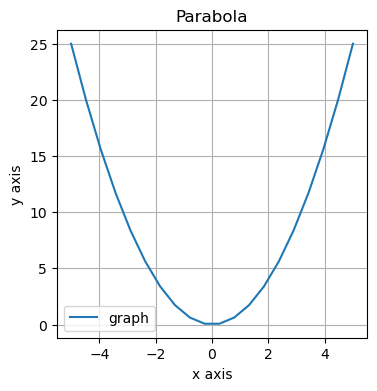

In [15]:
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y = np.array([j ** 2 for j in x])

plt.figure(figsize=(4,4))
plt.plot(x, y,  label="graph")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Parabola")
plt.legend()
plt.grid()
plt.show()

What happens if the independent variable is not sorted before plotting? Try plotting directly using the following defined array.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
np.random.shuffle(x)
y = np.array([j ** 2 for j in x])
```

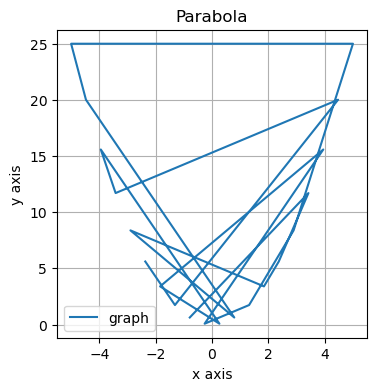

[-2.36842105 -1.31578947  4.47368421 -3.42105263 -3.94736842  0.26315789
 -1.84210526  3.94736842 -0.26315789  1.31578947  2.89473684  5.
 -5.         -4.47368421  0.78947368 -2.89473684  1.84210526  2.36842105
  3.42105263 -0.78947368]
[ 5.60941828  1.73130194 20.01385042 11.70360111 15.58171745  0.06925208
  3.3933518  15.58171745  0.06925208  1.73130194  8.37950139 25.
 25.         20.01385042  0.6232687   8.37950139  3.3933518   5.60941828
 11.70360111  0.6232687 ]


In [16]:
x = np.linspace(-5, 5, num=20)
np.random.shuffle(x)
y = np.array([j ** 2 for j in x])

plt.figure(figsize=(4,4))
plt.plot(x, y,  label="graph")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Parabola")
plt.legend()
plt.grid()
plt.show()
print(x)
print(y)

(b) Create multiple arrays and plot them with different styles, add legends, add text/mathematical equations on the plot.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])
y2 = np.array([j ** 2 for j in x])
y3 = np.array([j ** 3 for j in x])
```

copy the code above to the following cell and add code for plotting curve $\left(x, y1\right)$, $\left(x, y2\right)$ and $\left(x, y3\right)$.

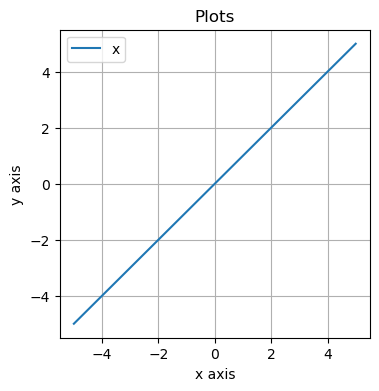

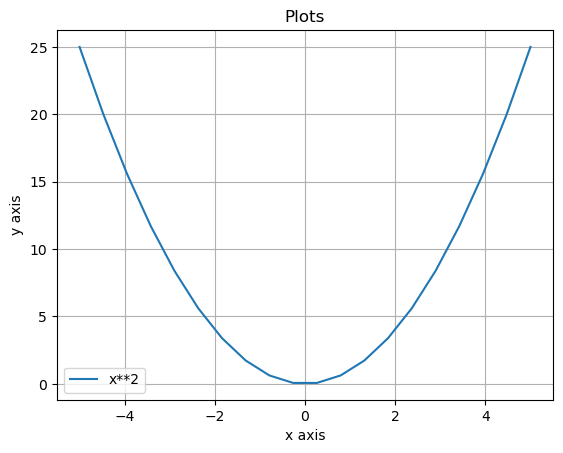

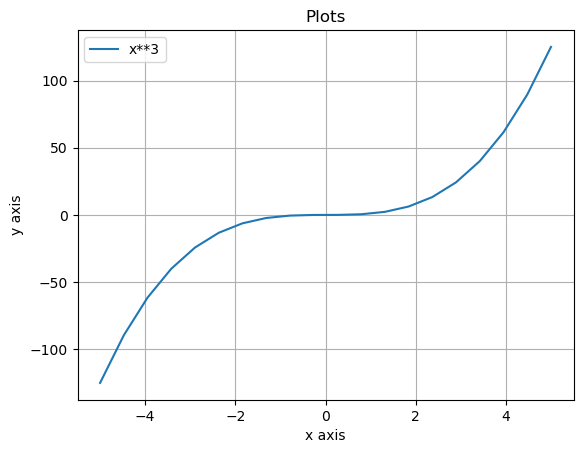

In [17]:
x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])
y2 = np.array([j ** 2 for j in x])
y3 = np.array([j ** 3 for j in x])

plt.figure(figsize=(4,4))
plt.plot(x, y1, label="x")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Plots")
plt.legend()
plt.grid()
plt.show()

plt.plot(x, y2, label="x**2")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Plots")
plt.legend()
plt.grid()
plt.show()

plt.plot(x, y3, label="x**3")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Plots")
plt.legend()
plt.grid()
plt.show()

(c) Create multiple arrays and plot them into one figure **(No multiple figure and no subplot is allowed in this question)**.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])
y2 = np.array([j ** 2 for j in x])
y3 = np.array([j ** 3 for j in x])
```

copy the code above to the following cell and add code for plotting curve $\left(x, y1\right)$, $\left(x, y2\right)$ and $\left(x, y3\right)$.

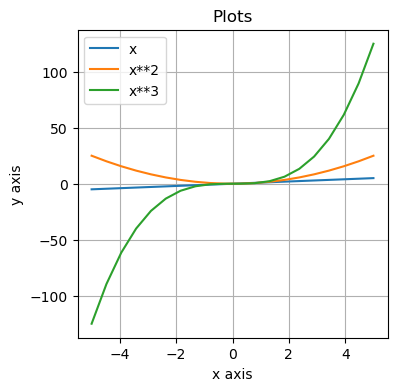

In [18]:
x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])
y2 = np.array([j ** 2 for j in x])
y3 = np.array([j ** 3 for j in x])

plt.figure(figsize=(4,4))
plt.plot(x, y1, label="x")
plt.plot(x, y2, label="x**2")
plt.plot(x, y3, label="x**3")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Plots")
plt.legend()
plt.grid()
plt.show()

(d) Create multiple subplots, play around with the figure size, figure title, and its font style and font size **(One curve is plotted in one subplot in this question)**.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y1 = np.array([j for j in x])
y2 = np.array([j ** 2 for j in x])
y3 = np.array([j ** 3 for j in x])
```

copy the code above to the following cell and add code for plotting curve $\left(x, y1\right)$, $\left(x, y2\right)$ and $\left(x, y3\right)$.

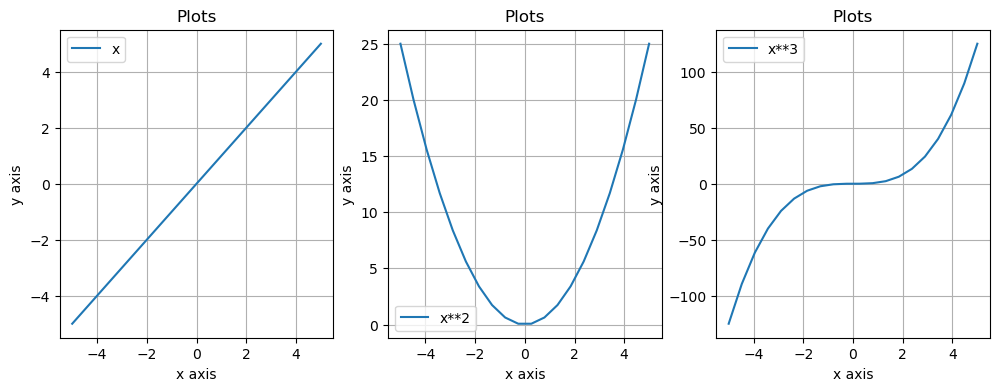

In [19]:
plt.figure(figsize = (12,4))

plt.subplot(1,3,1)
plt.plot(x, y1, label="x")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Plots")
plt.legend()
plt.grid()

plt.subplot(1,3,2)
plt.plot(x, y2, label="x**2")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Plots")
plt.legend()
plt.grid()

plt.subplot(1,3,3)
plt.plot(x, y3, label="x**3")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Plots")
plt.legend()
plt.grid()
plt.show()

(e) Change the limits on x and y axes, **use logarithmic axes to plot**.

```python
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-5, 5, num=20)
y = np.array([j ** 2 for j in x])
```

copy the code above to the following cell and add code for plotting the parabola.

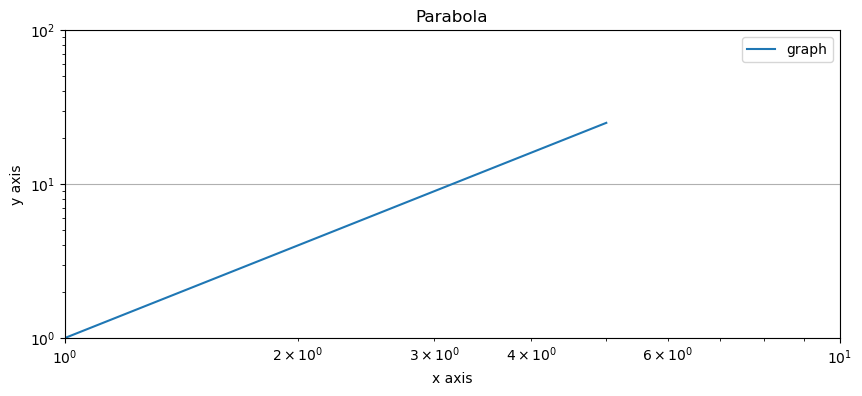

In [20]:
x = np.linspace(-5, 5, num=20)
y = np.array([j ** 2 for j in x])
#log_x = np.log(x)
#log_y = np.log(y)
#print(log_x)
#print(log_y)
#print(y)

plt.figure(figsize=(10,4))
plt.xscale('log')
plt.yscale('log')
plt.ylim(ymin=1,ymax=100)
plt.xlim(xmin=1,xmax=10)
#plt.plot(log_x, log_y,  label="graph")
plt.plot(x, y,  label="graph")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Parabola")
plt.legend()
plt.grid()
plt.show()

### Pandas's DataFrame.plot and Seaborn

#### Pandas's DataFrame.plot

Use the Salaries.csv again (You can use the dataframe object loaded from section 3.1).

(a) For team 'ATL', plot a scatter plot between feature yearID and salary.

<Axes: xlabel='yearID', ylabel='salary'>

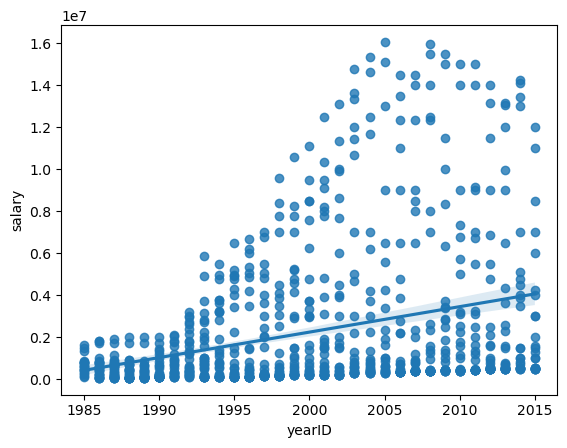

In [21]:
import seaborn as sns
salary_ATL = salary[salary["teamID"]=="ATL"]
sns.regplot(x=salary_ATL["yearID"], y=salary_ATL["salary"])
#ATL.plot(x='yearID', y='salary', kind='scatter')

(b) For year 1985, plot a bar chart to show the average salary for each team.

<Axes: xlabel='teamID'>

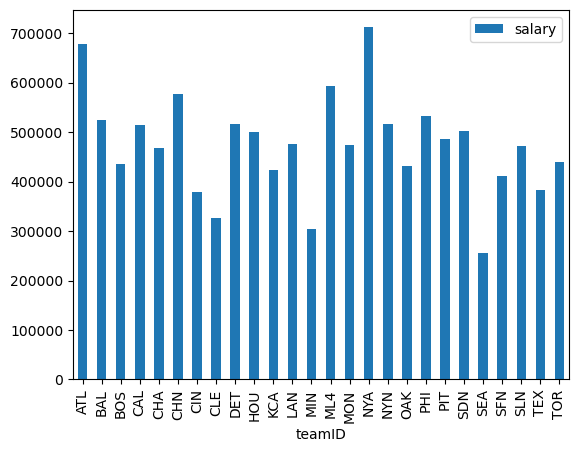

In [22]:
yr_1985 = salary[salary["yearID"]==1985]
mean_sal_1985 = yr_1985.groupby("teamID")[["salary"]].mean()
#mean_sal_1985
mean_sal_1985.plot(kind="bar")

(c) For team 'ATL', plot a line chart to show how the annual average salary change by years.

<Axes: xlabel='yearID'>

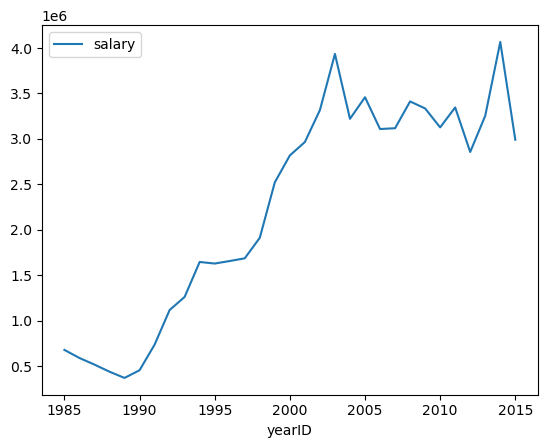

In [23]:
#salary_ATL
mean_sal_ATL = salary_ATL.groupby("yearID")[["salary"]].mean()
#mean_sal_ATL
mean_sal_ATL.plot(kind="line")

#### Seaborn

(a) Append one more numeric feature to the data frame (can be generated randomly), then for team 'ATL', use the seaborn.pairplot to plot scatter plots among all numeric features in the data frame for team. 

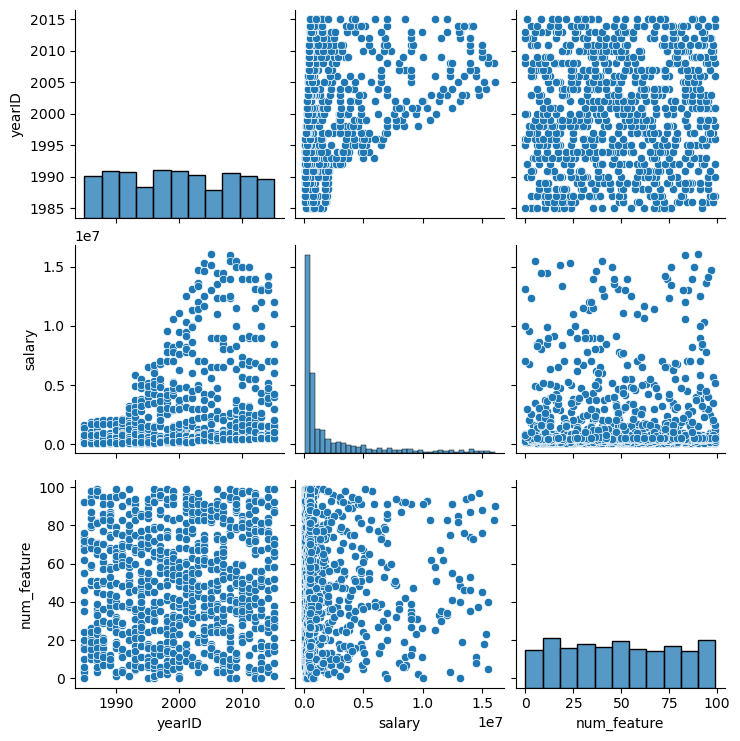

In [24]:
salary['num_feature'] = np.random.randint(0,100, size=salary.shape[0])

salary_ATL = salary[salary["teamID"]=="ATL"]
sns.pairplot(salary_ATL)
plt.show()

(b) For year 1985 and for each team, plot a boxplot to show how the salary distribute within a team.

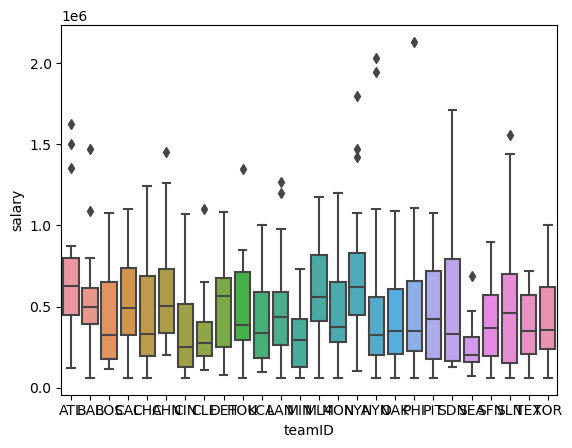

In [25]:
sal_1985 = salary[salary["yearID"]==1985]
sns.boxplot(x="teamID", y="salary", data=sal_1985)
plt.show()

(c) Read the offical documentation (https://seaborn.pydata.org/) to understand how lmplot, catplot, relplot, and jointplot works.

### Jupyter Notebook

#### Jupyter Notebook Extensions

Extensions such as the code formatter, table of content is to make your development more efficient. To explore it, please refer to https://github.com/ipython-contrib/jupyter_contrib_nbextensions.

#### Jupyter Visual Debugger

The Pixie Debugger is a visual debugger for debugging on Jupyter Notebook. To explore it, please refer to https://medium.com/codait/the-visual-python-debugger-for-jupyter-notebooks-youve-always-wanted-761713babc62.

### Git and GitHub

1. In the directory that where this jupyter notebook file locates in, init a Git repository.
2. Checkout a new branch called dev and commit the current notebook within this branch.
3. Merge the dev branch to the master branch (the default branch).
4. Create a temporary repository (just for practicing and you can delete it later) in GitHub. 
5. Push new changes in the master branch to the remote repository created in step 4.
6. Checkout the dev branch again and do some changes to your notebook, and then repeat step 3 and step 5.